## Libraries

In [22]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Data Import

In [2]:
df_purchase = pd.read_csv('purchase data.csv')

## Data Exploration

In [3]:
df_purchase.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [4]:
# Check if there are missing values
df_purchase.isnull().sum()

ID                   0
Day                  0
Incidence            0
Brand                0
Quantity             0
Last_Inc_Brand       0
Last_Inc_Quantity    0
Price_1              0
Price_2              0
Price_3              0
Price_4              0
Price_5              0
Promotion_1          0
Promotion_2          0
Promotion_3          0
Promotion_4          0
Promotion_5          0
Sex                  0
Marital status       0
Age                  0
Education            0
Income               0
Occupation           0
Settlement size      0
dtype: int64

## Data Segmentation

### Import Segmentation Model

In [6]:
scaler = pickle.load(open('scaler.pickle', 'rb'))

In [7]:
pca = pickle.load(open('pca.pickle', 'rb'))

In [8]:
kmeans_pca = pickle.load(open('kmeans_pca.pickle', 'rb'))

### Standardization

In [9]:
features = df_purchase[['Sex', 'Marital status', 'Age', 'Education', 'Income', 'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

### PCA

In [10]:
# Apply pca on the purchase data and obtain 3 principal components for each row in the table. 
# It will be containing duplicates.
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

### K-means PCA

In [11]:
# Based on the principal components, use the predict method from pca to segment the purchase data into the four segment.
purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [12]:
# Copy resulting data frame as a purchase predictors data frame. 
# There will be change in the predictors data frame, (adding and changing columns). Therefore, keep an original copy.
df_purchase_predictors = df_purchase.copy()

In [13]:
# Add segment information as a new column in our predictors data frame.
df_purchase_predictors['Segment'] = purchase_segm_kmeans_pca

## Descriptive Analysis by Segments

### Data Analysis by Customer

In [15]:
# Create data frame with one record per individual. Purchase occasions by customer ID
temp1 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).count()
# Set index to ID
temp1 = temp1.set_index('ID')
# Change the name of 'Incidence' to 'N_Visits'
temp1 = temp1.rename(columns = {'Incidence': 'N_Visits'})
temp1

,N_Visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111
...,...
200000496,120
200000497,120
200000498,131


In [16]:
# Number of purchases per customer ID
temp2 = df_purchase_predictors[['ID', 'Incidence']].groupby(['ID'], as_index = False).sum()
# Set index to ID
temp2 = temp2.set_index('ID')
# Change the name of 'Incidence' to 'N_Purchases'
temp2 = temp2.rename(columns = {'Incidence': 'N_Purchases'})
temp2

,N_Purchases
ID,
200000001,9
200000002,11
200000003,10
200000004,11
200000005,13
...,...
200000496,20
200000497,43
200000498,39


In [17]:
# Join tables temp1 and temp2
temp3 = temp1.join(temp2)
temp3

,N_Visits,N_Purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13
...,...,...
200000496,120,20
200000497,120,43
200000498,131,39


In [18]:
# Average number of purchases by customer ID
temp3['Average_N_Purchases'] = temp3['N_Purchases'] / temp3['N_Visits']
temp3.head()

,N_Visits,N_Purchases,Average_N_Purchases
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [20]:
# Obtain the segment for each customer in the data set.
temp4 = df_purchase_predictors[['ID', 'Segment']].groupby(['ID'], as_index = False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr

,N_Visits,N_Purchases,Average_N_Purchases,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1
...,...,...,...,...
200000496,120,20,0.166667,0
200000497,120,43,0.358333,2
200000498,131,39,0.297710,0


### Segment Proportions

In [21]:
# Calculate the proportions of each segment and set the appropriate column name. 
# df_purchase_descr.shape[0] == No. of observations
segm_prop = df_purchase_descr[['N_Purchases', 'Segment']].groupby(['Segment']).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_Purchases': 'Segment Proportions'})
segm_prop.head()

,Segment Proportions
Segment,
0,0.206
1,0.220
2,0.378
3,0.196


Text(0.5, 1.0, 'Segment Proportions')

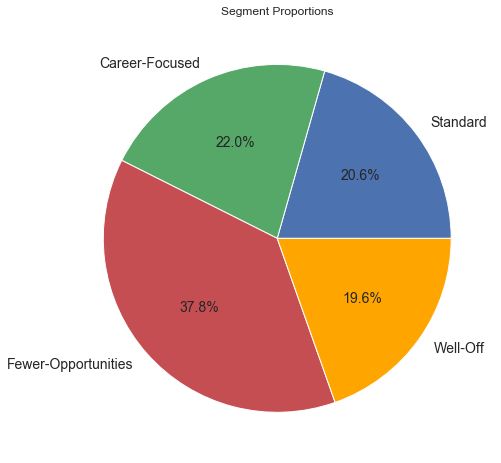

In [30]:
# Visualization: Pie chart
plt.figure(figsize = (10,8))
plt.pie(segm_prop['Segment Proportions'],
        labels = ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'],
        autopct = '%1.1f%%',
        colors = ('b', 'g', 'r', 'orange'),
        textprops = {'fontsize': 14})
plt.title('Segment Proportions')

### Purchase Occasion and Purchase Incidence

Goal is to find a quantitiative measure to describe the purchase behaviours by segments

In [27]:
# Calculate the mean by the four segments. It will help determine the average customer behaivour in each segment.
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_Visits,N_Purchases,Average_N_Purchases
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [28]:
# Calculate the standard deviation by segments. It will help determine how homogoneus each of the segments is.
segments_std = df_purchase_descr.groupby(['Segment']).std()

Text(0.5, 1.0, 'Average Number of Store Visits by Segment')

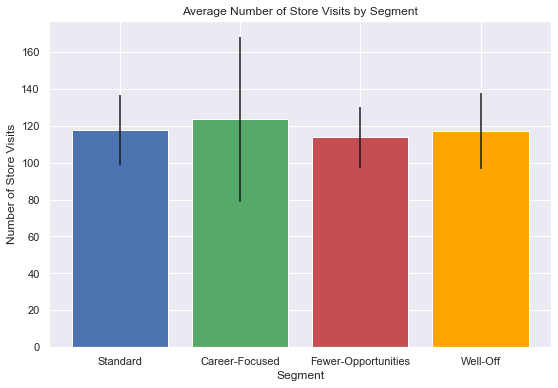

In [29]:
# Plot the average number of store visits for each of the four segments using a bar chart.
# Display the standard deviation as a straight line. The bigger the length, the higher the standard deviation is.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Visits'],
        yerr = segments_std['N_Visits'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average Number of Store Visits by Segment')

Text(0.5, 1.0, 'Number of Purchases by Segment')

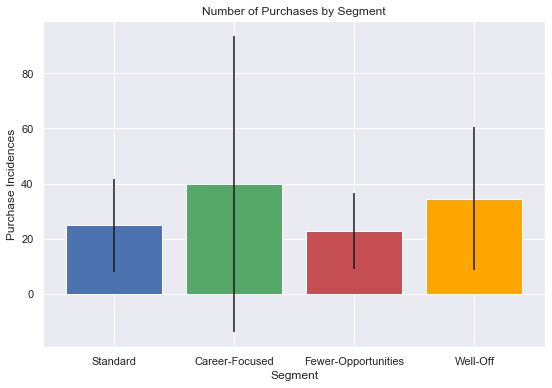

In [31]:
# Display the average number of purchases by segments. 
# They will help understand how often each group buys chocholate candy bars.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3),
        tick_label = ('Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'), 
        height = segments_mean['N_Purchases'],
        yerr = segments_std['N_Purchases'],
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Number of Purchases by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

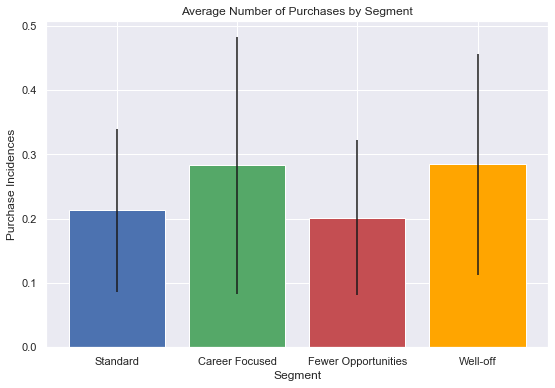

In [32]:
# Display the average number of purchases.
plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

Text(0.5, 1.0, 'Average Number of Purchases by Segment')

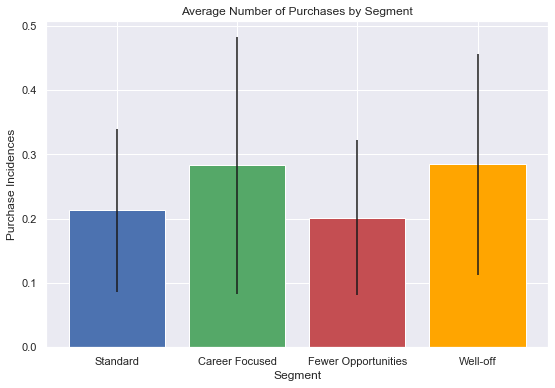

In [33]:
# Display the average number of purchases.
# We observe, that the ‘career focused’ segment buys products more often. However, once again, 
# we see that its standard deviation is the highest. 
# It might be that a part of the segment buys products very frequently, and another part less so. 
# Although consumers in this segment have a somewhat similar income, the way they might want to spend their money might differ. 
# The most homogenous segment appears to be that of the ‘Fewer-Opportunities’. 
# This is signified by the segment having the lowest standard deviation or shortest vertical line. 
# The first segment seems consistent as well, with about 25 average purchases and a standard deviation of 30.
# What’s worth mentioning is that the ‘career focused’ cluster is very different in both graphs. 
# The other 3 segments had a very similar ‘store visits’ information,
# yet it is evident that the well-off cluster actually buys goods more often. 

plt.figure(figsize = (9, 6))
plt.bar(x = (0, 1, 2, 3), 
        tick_label = ('Standard','Career Focused','Fewer Opportunities','Well-off'),
        height = segments_mean['Average_N_Purchases'], 
        yerr = segments_std['Average_N_Purchases'], 
        color = ('b', 'g', 'r', 'orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase Incidences')
plt.title('Average Number of Purchases by Segment')

### Brand Choice

In [34]:
# Select only rows where incidence is one. It is the times a purchase was made.
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [35]:
# Here we make dummies for each of the five brands.
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix = 'Brand', prefix_sep = '_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,Brand_1,Brand_2,Brand_3,Brand_4,Brand_5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [36]:
temp = brand_dummies.groupby(['ID'], as_index = True).mean()

In [37]:
mean_brand_choice = temp.groupby(['Segment'], as_index = True).mean()

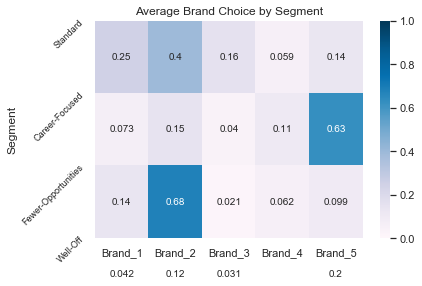

In [38]:
# brand_1 cheapest, brand_4 most expensive
sns.heatmap(mean_brand_choice,
            vmin = 0, 
            vmax = 1,
            cmap = 'PuBu',
            annot = True)
plt.yticks([0, 1, 2, 3], ['Standard', 'Career-Focused', 'Fewer-Opportunities', 'Well-Off'], rotation = 45, fontsize = 9)
plt.title('Average Brand Choice by Segment')
plt.show()
